Objectfive :

create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df_survived = pd.read_csv('gender_submission.csv')
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_train['Sex'].replace(["female","male"],[0,1],inplace=True)

In [4]:
df_train['Embarked'].replace(["C","Q", "S"],[0,1,2],inplace=True)

In [5]:
df_train[df_train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [6]:
# 2 missing values in 'Embarked', replace by mean
# PassengerId 62 and 830
df_train['Embarked'] = df_train['Embarked'].replace(
    np.nan, df_train[df_train['Embarked'].isnull() == False]['Embarked'].mean())

In [7]:
### standardisation
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_train[['Pclass', 'Sex', 'Fare', 'Embarked']])

df_train[['Pclass', 'Sex', 'Fare', 'Embarked']] = scaler.transform(df_train[['Pclass', 'Sex', 'Fare', 'Embarked']])

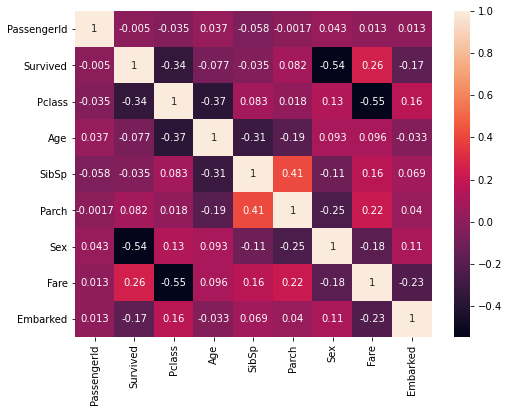

In [8]:
# matrice de corrélation entre features

corr_df = df_train[df_train.isnull() == False][['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Sex', 'Fare',
    'Embarked']].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Regression logistique

### Préparation des données

In [9]:
X_train = df_train[['Pclass', 'Sex', 'Fare', 'Embarked']]
y_train = df_train[['Survived']]

In [10]:
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression()

nombre de features optimal: 1
features sélectionnés: ['Sex']


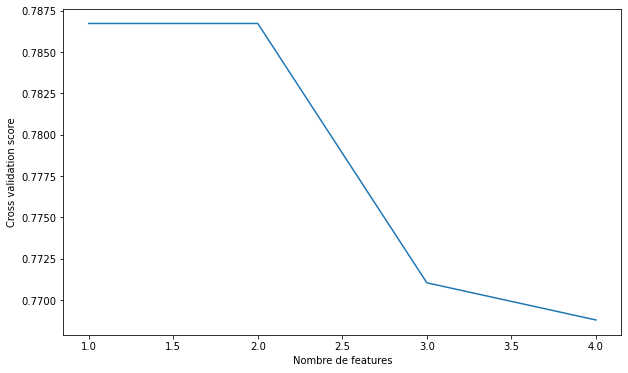

In [11]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

rfe = RFE(model_rl, 5)
rfe = rfe.fit(X_train, y_train)


rfecv = RFECV(estimator = LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("nombre de features optimal: %d" % rfecv.n_features_)
print('features sélectionnés: %s' % list(X_train.columns[rfecv.support_]))

# nombre de variable en fonction des scores de cross-validation scores
plt.figure(figsize = (10, 6))
plt.xlabel("Nombre de features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
model_rl = LogisticRegression()

# entrainement du modèle

model_rl.fit(X_train[['Pclass', 'Sex', 'Fare', 'Embarked']], y_train)

LogisticRegression()

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(5)
print("score du train set:", cross_val_score(model_rl, X_train, y_train, cv = cv).mean())

score du train set: 0.7755508128805474


### Validation du modèle

In [14]:
df_test['Sex'].replace(["female","male"],[0,1],inplace=True)
df_test['Embarked'].replace(["C","Q", "S"],[0,1,2],inplace=True)

In [15]:
df_test[['Pclass', 'Sex', 'Fare', 'Embarked']] = scaler.transform(df_test[['Pclass', 'Sex', 'Fare', 'Embarked']])

In [24]:
# valider le modèle regression logistique

X_test = df_test[['Pclass', 'Sex', 'Fare', 'Embarked']]
y_test = pd.merge(df_test, df_survived, left_on = 'PassengerId', right_on = 'PassengerId')[['Survived']]

X_test['Fare'] = X_test['Fare'].replace(
    np.nan, X_test[X_test['Fare'].isnull() == False]['Fare'].mean())

print("score du test set:",model_rl.score(X_test[['Pclass', 'Sex', 'Fare', 'Embarked']],y_test))

score du test set: 0.9330143540669856
